In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
from network import Network
import torch


In [2]:
# Import Dataset
qcd_raw = pd.read_csv('../HiggsReconstruction/EventPlotting/qcd_outputDataForLearning.csv')
hh_raw = pd.read_csv('../HiggsReconstruction/EventPlotting/dihiggs_outputDataForLearning.csv')

qcd_raw.head()
print(len(qcd_raw), "rows of qcd data")
hh_raw.head()
print(len(hh_raw), "rows of dihiggs data")

# Make higgs and qcd sets from raw data
hh_all = hh_raw[['h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)']]
qcd = qcd_raw[['h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)']]
# hh_all = hh_raw[['h1_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)']]
# qcd = qcd_raw[['h1_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)']]
n_factors = np.shape(hh_all)[1]
print(n_factors)

1703 rows of qcd data
4605 rows of dihiggs data
4


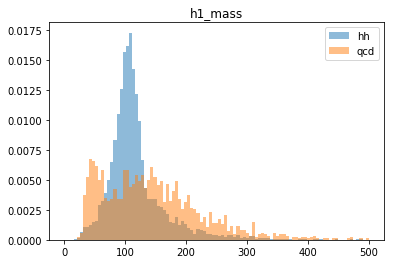

In [3]:
plt.hist(hh_raw['h1_mass'], label="hh", density=1, alpha=.5, bins=np.linspace(0, 500, 100))
plt.hist(qcd_raw['h1_mass'], label="qcd", density=1, alpha=.5, bins=np.linspace(0, 500, 100))
plt.title("h1_mass")
plt.legend()
plt.show()

In [4]:
hh_all = np.array(hh_all)
qcd = np.array(qcd)

# add labels to di-higgs
hh_all=hh_all[:,:n_factors]
# print(hh[0:3])
hh_labels= np.zeros((len(hh_all),1))
hh_labels = hh_labels+1
#a = hh[:len(hh)]
# print(a.shape)
hh_all = np.append(hh_all, hh_labels, axis=1)
# hh_all = np.append(hh_all, 1- hh_labels, axis=1)## hh qcd labels 

# print(hh.shape)
# print(hh[0:3])

# add labels to qcd
qcd=qcd[:,:n_factors]
# print(hh[0:3])
qcd_labels= np.zeros((len(qcd),1))
#a = hh[:len(hh)]
# print(a.shape)
# qcd hh labels 
qcd = np.append(qcd, 1-qcd_labels, axis=1)
# qcd = np.append(qcd, qcd_labels, axis=1) # qcd qcd labels
# 

# print(hh.shape)
# print(hh[0:3])
# print(qcd[:4])

# select a quarter of hh events so that the set is half and half
# we shuffle the list first to take a random 1/4. this means we have a different dataset every time
# np.random.seed(0)
# np.random.shuffle(hh_all) 
hh = hh_all[0:len(qcd)]
# print(hh[:4])
# print(qcd[:4])

all_data = np.append(hh,qcd, axis=0) 
all_data[:n_factors,:]

np.random.seed(0)
for i in range (4): # shuffle 4 times
    np.random.shuffle(all_data) 
print(all_data[:])
all_labels = all_data[:,n_factors:]
all_data = all_data[:,:n_factors]
# print(all_data[:4])
print(all_labels[:4])
# print(test_data)
# print(len(all_data))
# print(all_labels)

[[ 99.52746498 123.72713519   1.83328407   2.89078642   1.        ]
 [184.71024749  77.62334247   2.84355966   1.90858838   1.        ]
 [ 30.47812488  17.83909044   0.69238905   0.53948599   1.        ]
 ...
 [127.36637881  80.11506736   2.98781787   3.1486243    1.        ]
 [130.07582189 157.31572323   3.04481735   2.7546253    1.        ]
 [194.77739482 302.90108665   3.01059324   2.43078381   1.        ]]
[[1.]
 [1.]
 [1.]
 [1.]]


In [5]:
# scale the data by dividing it by the max value of each
for i in range(np.shape(all_data)[1]):
    all_data[:,i] = np.true_divide(all_data[:,i], np.max(all_data[:,i]))


In [6]:
# TODO: Train-Test split
train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, train_size=0.5, test_size=0.5, random_state=42)
# print(len(train_data))
# print(train_data)
# print(train_data.shape)
# print(train_labels)
train_data = torch.from_numpy(train_data)
test_data = torch.from_numpy(test_data)
train_labels = torch.from_numpy(train_labels)
test_labels = torch.from_numpy(test_labels)

print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)


torch.Size([1703, 4])
torch.Size([1703, 4])
torch.Size([1703, 1])
torch.Size([1703, 1])


In [7]:
learnRate = 0.001 
np.random.seed(0)
model = Network([n_factors, 6, 1])
model.train(train_data, train_labels, 501, learnRate, True, test_data, test_labels)


train accuracy at epoch 0 is: tensor(6.9912)
test accuracy is: tensor(7.0455)
train accuracy at epoch 50 is: tensor(89.7837)
test accuracy is: tensor(89.7837)
train accuracy at epoch 100 is: tensor(93.3586)
test accuracy is: tensor(93.3586)
train accuracy at epoch 150 is: tensor(94.8003)
test accuracy is: tensor(94.8003)
train accuracy at epoch 200 is: tensor(95.6095)
test accuracy is: tensor(95.6095)
train accuracy at epoch 250 is: tensor(96.1397)
test accuracy is: tensor(96.1397)
train accuracy at epoch 300 is: tensor(96.5197)
test accuracy is: tensor(96.5197)
train accuracy at epoch 350 is: tensor(96.8085)
test accuracy is: tensor(96.8085)
train accuracy at epoch 400 is: tensor(97.0372)
test accuracy is: tensor(97.0372)
train accuracy at epoch 450 is: tensor(97.2240)
test accuracy is: tensor(97.2240)
train accuracy at epoch 500 is: tensor(97.3801)
test accuracy is: tensor(97.3801)


TypeError: data type not understood

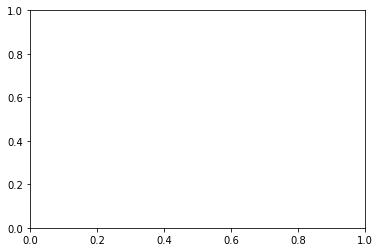

In [11]:
# print(model.losses)
# plt.plot(model.losses, label="loss")
plt.plot(model.train_accuracies, label="train accuracy", marker=".")
plt.plot(model.test_num, model.test_accuracies, label="test accuracy", marker=".")
plt.legend()

In [ ]:
plt.plot(model.losses)